<a href="https://colab.research.google.com/github/Costanza22/Monte-Carlo-Clima/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise do Clima de Canberra, Austrália usando Simulação de Monte Carlo

Este projeto tem como objetivo analisar e prever padrões climáticos em Canberra, Austrália, utilizando a técnica de Simulação de Monte Carlo. A Simulação de Monte Carlo é um método estatístico que utiliza a randomização para resolver problemas que podem ter um componente de incerteza.

Esse código gera histogramas que representam simulações de Monte Carlo para as variáveis climáticas: temperatura mínima, temperatura máxima, umidade às 9h e 15h, e pressão às 9h e 15h.

Os dados originais foram fornecidos para a cidade de Canberra e foram usados para calcular médias e desvios padrão. Em seguida, foram realizadas 5000 simulações de Monte Carlo para gerar distribuições aleatórias dessas variáveis, assumindo uma distribuição normal com média e desvio padrão calculados a partir dos dados originais. Os histogramas mostram a distribuição dessas simulações para cada variável climática.

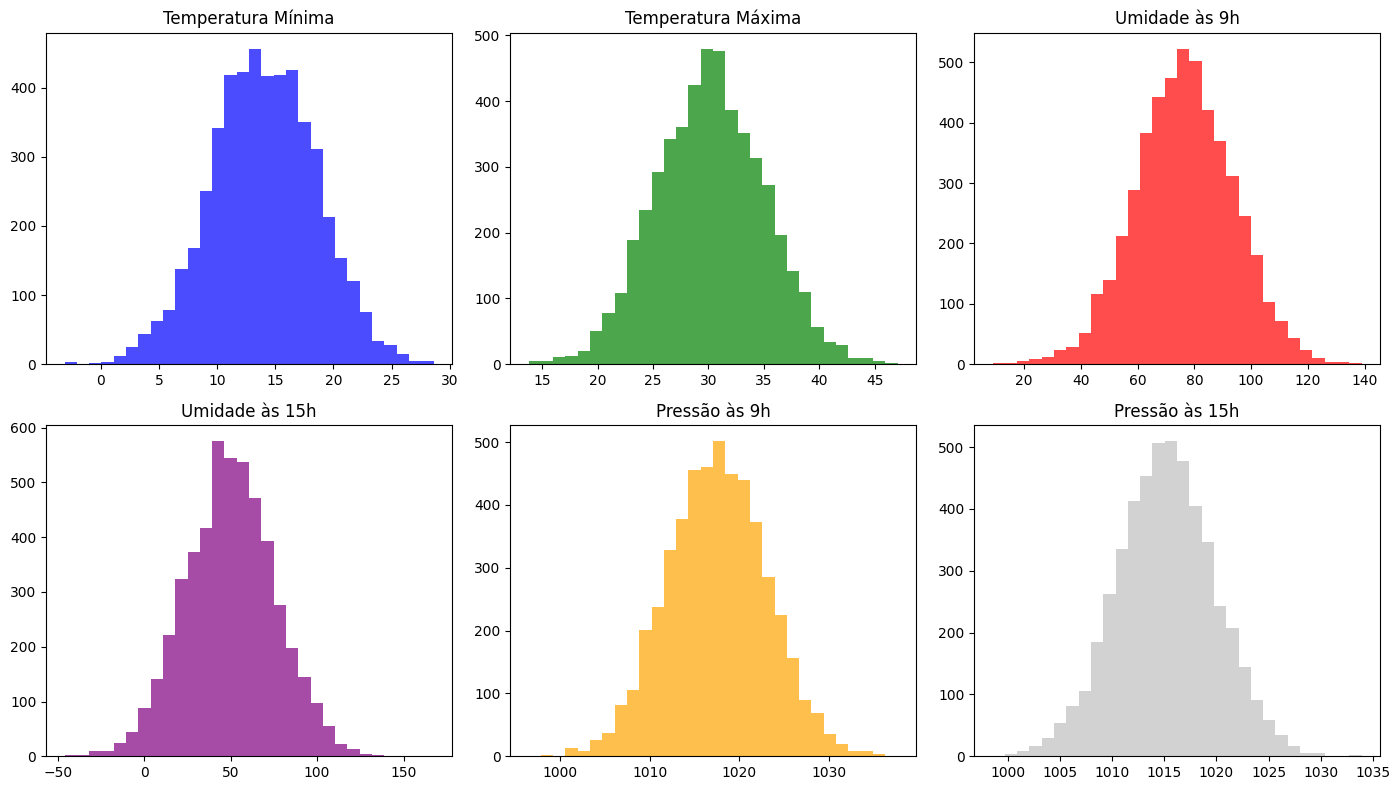

In [8]:
#simular as temperaturas mínimas e máximas, umidade às 9h e 15h, e a pressão às 9h e 15h
#Link para dados: https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data

#Parâmetros
#Definição de Parâmetros da Simulação:

#num_simulations: Define o número de simulações de Monte Carlo a serem realizadas (5000 neste caso).
#simulated_data: Dicionário para armazenar os dados simulados de cada variável climática.

import numpy as np
#np.random.normal Fórmula está dentro da função np. random.normal P(x) = (1 / (σ * √(2π))) * exp(-((x - μ)^2) / (2 * σ^2))

#σ: Desvio padrão da distribuição normal(sigma)
#μ: Média da distribuição normal(mi)
#e: Log

import pandas as pd
import matplotlib.pyplot as plt

# Criação do dataframe com os dados fornecidos
data = {
    "RowID": [13996, 13997, 13998, 13999, 14000, 14001, 14002],
    "Localização": ["Canberra"] * 7,
    "Temperatura Mínima": [18.9, 13.2, 16.2, 19.8, 11.1, 11.1, 7.8],
    "Temperatura Máxima": [34, 30.1, 37.1, 33.3, 24.5, 24.1, 28.1],
    "Umidade às 9h": [100, 76, 53, 98, 65, 67, 77],
    "Umidade às 15h": [99, 32, 14, 56, 53, 53, 45],
    "Pressão às 9h": [1014.1, 1021.1, 1012.2, 1009.8, 1018.8, 1024, 1022.4],
    "Pressão às 15h": [1011.6, 1017.9, 1007.9, 1012.2, 1016.9, 1021.8, 1017.8]
}

df = pd.DataFrame(data)

# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calculando a média e o desvio padrão

#Parâmetros
mean_values = numeric_df.mean()
std_values = numeric_df.std()

# Número de simulações
num_simulations = 5000

# Dicionário para armazenar os resultados das simulações
simulated_data = {
    "Temperatura Mínima": [],
    "Temperatura Máxima": [],
    "Umidade às 9h": [],
    "Umidade às 15h": [],
    "Pressão às 9h": [],
    "Pressão às 15h": []
}

# Realizando as simulações de Monte Carlo
np.random.seed(42)  # Para reprodutibilidade

for _ in range(num_simulations):
    simulated_data["Temperatura Mínima"].append(np.random.normal(mean_values["Temperatura Mínima"], std_values["Temperatura Mínima"]))
    simulated_data["Temperatura Máxima"].append(np.random.normal(mean_values["Temperatura Máxima"], std_values["Temperatura Máxima"]))
    simulated_data["Umidade às 9h"].append(np.random.normal(mean_values["Umidade às 9h"], std_values["Umidade às 9h"]))
    simulated_data["Umidade às 15h"].append(np.random.normal(mean_values["Umidade às 15h"], std_values["Umidade às 15h"]))
    simulated_data["Pressão às 9h"].append(np.random.normal(mean_values["Pressão às 9h"], std_values["Pressão às 9h"]))
    simulated_data["Pressão às 15h"].append(np.random.normal(mean_values["Pressão às 15h"], std_values["Pressão às 15h"]))

# Convertendo os resultados simulados em DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Plotando os resultados
plt.figure(figsize=(14, 8))

# Plot para Temperatura Mínima
plt.subplot(2, 3, 1)
plt.hist(simulated_df["Temperatura Mínima"], bins=30, color='blue', alpha=0.7)
plt.title('Temperatura Mínima')

# Plot para Temperatura Máxima
plt.subplot(2, 3, 2)
plt.hist(simulated_df["Temperatura Máxima"], bins=30, color='green', alpha=0.7)
plt.title('Temperatura Máxima')

# Plot para Umidade 9h
plt.subplot(2, 3, 3)
plt.hist(simulated_df["Umidade às 9h"], bins=30, color='red', alpha=0.7)
plt.title('Umidade às 9h')

# Plot para Umidade 15h
plt.subplot(2, 3, 4)
plt.hist(simulated_df["Umidade às 15h"], bins=30, color='purple', alpha=0.7)
plt.title('Umidade às 15h')

# Plot para Pressão 9h
plt.subplot(2, 3, 5)
plt.hist(simulated_df["Pressão às 9h"], bins=30, color='orange', alpha=0.7)
plt.title('Pressão às 9h')

# Plot para Pressão 15h
plt.subplot(2, 3, 6)
plt.hist(simulated_df["Pressão às 15h"], bins=30, color='silver', alpha=0.7)
plt.title('Pressão às 15h')

plt.tight_layout()
plt.show()



X: Valores da variável climática

Y: Frequência


No histograma da temperatura mínima, se a barra mais alta estiver no intervalo de 12 a 14 graus, podemos concluir que essa faixa de temperatura foi a mais frequente na simulação.
Se o histograma da umidade às 9h apresentar forma assimétrica com pico em valores baixos, podemos inferir que a umidade tende a ser baixa nesse horário.

Temperatura Mínima: 14.2°C

Temperatura Máxima: 30.7°C

Umidade às 9h: 77.1%

Umidade às 15h: 50.7%

Pressão às 9h: 1017.3 hPa

Pressão às 15h: 1016.1 hPa
